In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle

import math
from shapely import Polygon, Point, MultiPoint, MultiPolygon, GeometryCollection
from shapely.ops import voronoi_diagram
from shapely.strtree import STRtree
import pathlib
from numpy.random import randint
import numpy as np
from scipy import signal
from sklearn.preprocessing import MinMaxScaler

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
def plot_ped(ax, origin, angle, alpha):
    foot1_vector = (origin[0] + 0.1, origin[1] - 0.15)
    rotate_foot1_vector = (
        math.cos(angle * foot1_vector[0]) - math.sin(angle * foot1_vector[1]),
        math.sin(angle * foot1_vector[0]) + math.cos(angle * foot1_vector[1]),
    )
    foot_1 = Ellipse(
        rotate_foot1_vector, 0.2, 0.1, color="black", fill=False, angle=angle
    )
    foot_2 = Ellipse(
        (origin[0] - 0.1, origin[1] + 0.15),
        0.2,
        0.1,
        color="black",
        fill=False,
        angle=angle,
    )

    body = Ellipse(origin, 0.3, 0.5, color="gray", angle=angle, alpha=alpha)
    head = Ellipse(origin, 0.275, 0.2, color="black", angle=angle, alpha=alpha)

    # print(rotate_foot1_vector)
    # ax.add_patch(foot_1)
    # ax.add_patch(foot_2)
    ax.add_patch(body)
    ax.add_patch(head)
    ax.scatter(*origin, color="white")

# Geometries

## Walkable area

In [5]:
from shapely import Polygon
from pedpy import Geometry

walkable_area = Polygon([(-9, 0), (-9, 5), (9, 5), (9, 0)])
geometry = Geometry(walkable_area=walkable_area)

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfo

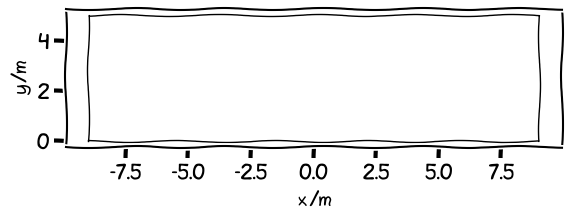

In [6]:
from pedpy import plot_geometry

with plt.xkcd(randomness=0.5):
    plot_geometry(geometry=geometry, hole_color="lightgrey").set_aspect("equal")
    plt.show()

## With bounding box

In [7]:
from shapely import Polygon
from pedpy import Geometry

walkable_area = Polygon([(-10, -3), (-10, 8), (10, 8), (10, -3)])
obstacles = [
    Polygon([(-9, -2), (-9, 0), (9, 0), (9, -2), (-9, -2)]),
    Polygon([(-9, 5), (-9, 7), (9, 7), (9, 5), (-9, 5)]),
]
geometry = Geometry(walkable_area=walkable_area, obstacles=obstacles)

# or add the obstacles one by one
geometry = Geometry(walkable_area=walkable_area)
geometry.add_obstacle(Polygon([(-9, -2), (-9, 0), (9, 0), (9, -2), (-9, -2)]))
geometry.add_obstacle(Polygon([(-9, 5), (-9, 7), (9, 7), (9, 5), (-9, 5)]))

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfo

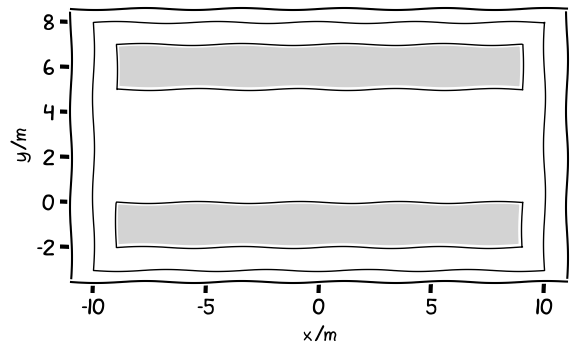

In [8]:
from pedpy import plot_geometry

with plt.xkcd(randomness=0.75):
    plot_geometry(geometry=geometry, hole_color="lightgrey").set_aspect("equal")
    plt.show()

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfo

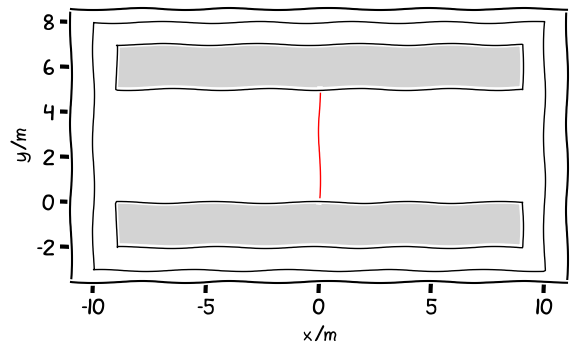

In [10]:
from shapely import LineString
from pedpy import plot_measurement_setup

measurement_line = LineString([(0, 0), (0, 5)])
with plt.xkcd(randomness=0.5):
    plot_measurement_setup(
        geometry=geometry,
        hole_color="lightgrey",
        measurement_lines=[measurement_line],
        ml_color="r",
    ).set_aspect("equal")
    plt.show()

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfo

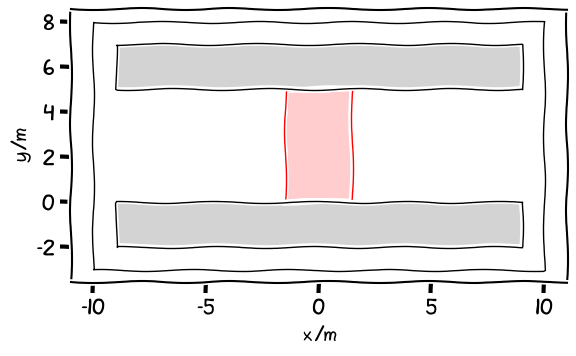

In [11]:
measurement_area = Polygon(
    [(-1.5, 0), (-1.5, 5), (1.5, 5), (1.5, 0), (-1.5, 0)]
)
with plt.xkcd(randomness=0.5):
    plot_measurement_setup(
        geometry=geometry,
        hole_color="lightgrey",
        measurement_areas=[measurement_area],
        ma_color="r",
        ma_alpha=0.1,
        ma_line_color="r",
    ).set_aspect("equal")
    plt.show()

# Setup

In [12]:
output_path = pathlib.Path("images")

In [13]:
peds = [
    ([0.1, 1.3], 3),
    ([2.6, 2.8], 10),
    ([2.1, 0.5], 4),
    ([1.3, 2.1], -5),
    ([0.4, 3.4], -4),
    ([-0.6, 0.4], 1),
    ([-1, 2.9], 3),
    ([-1.5, 1.5], -7),
    ([-2.1, 3], 8),
    ([-2.5, 0.7], -2),
]

## Classic denisty

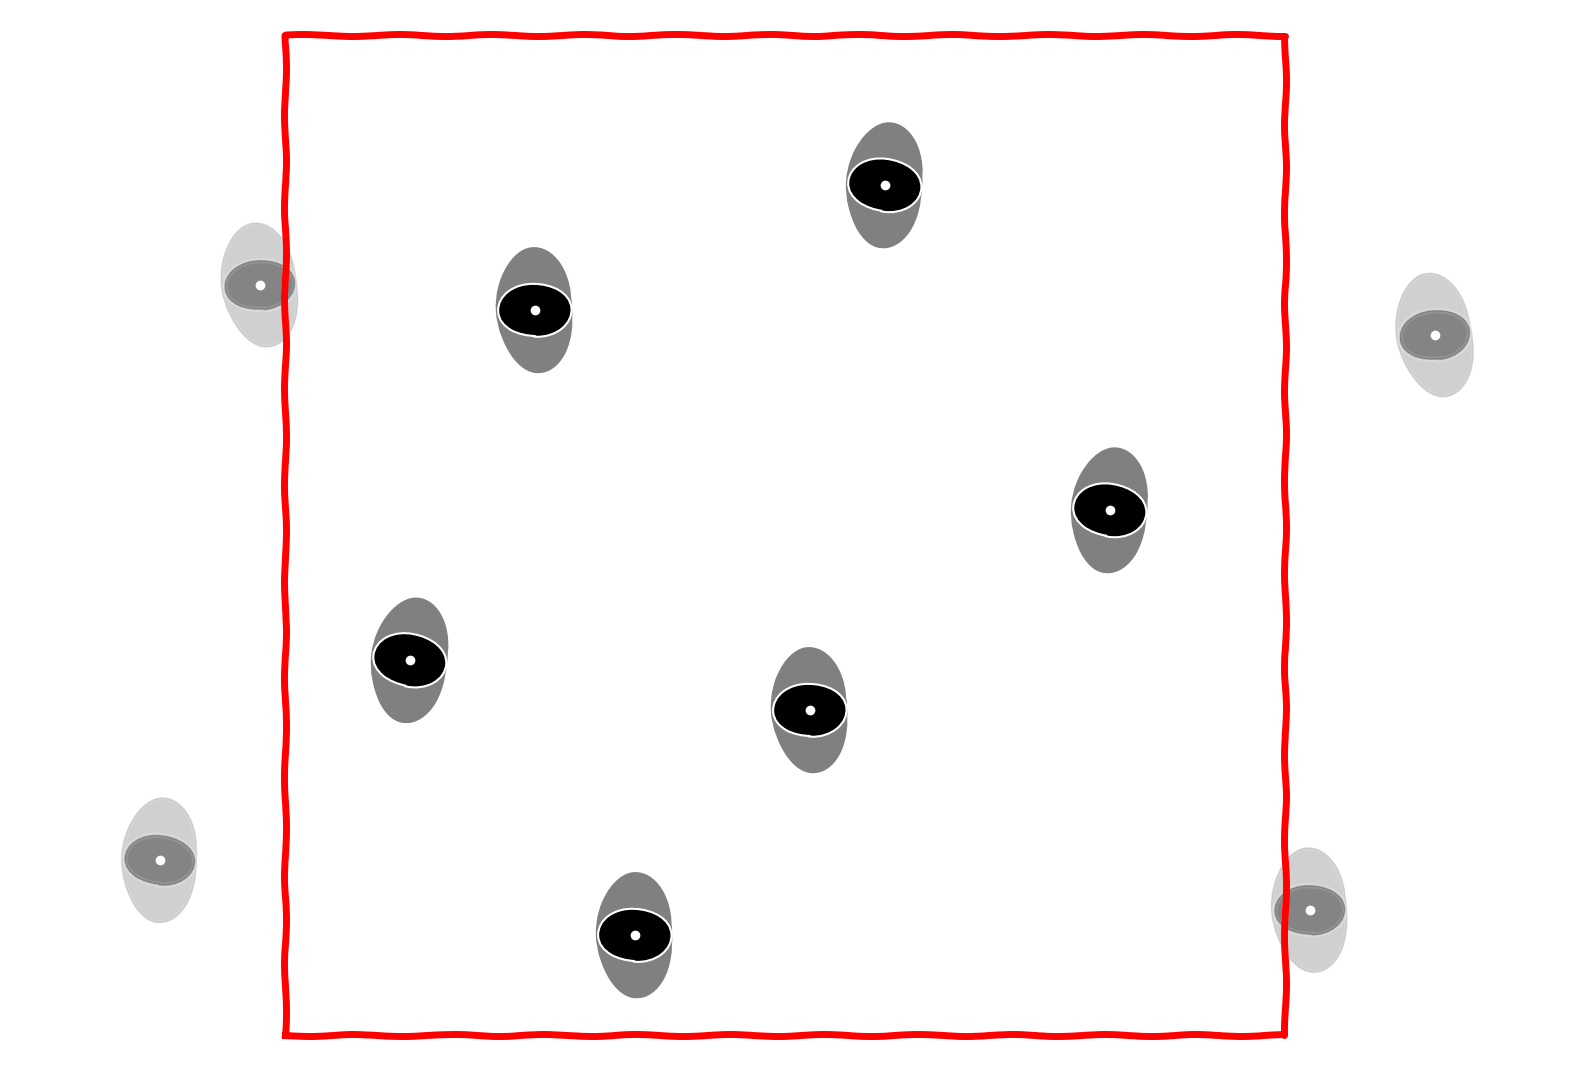

In [14]:
with plt.xkcd(randomness=0.5):
    measurement_area = Polygon([(-2, 0), (-2, 4), (2, 4), (2, 0)])
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_aspect("equal")

    # ax.fill(*measurement_area.exterior.xy, color="r", alpha=0.05)

    for ped in peds:
        alpha = 1 if measurement_area.contains(Point(ped[0])) else 0.2
        plot_ped(ax, ped[0], ped[1], alpha)

    ax.plot(*measurement_area.exterior.xy, color="r", lw=5)

    ax.set_xlim([-3.1, 3.1])
    ax.set_ylim([-0.1, 4.1])
    plt.axis("off")
    # plt.savefig(output_path / "classic_density.png", bbox_inches="tight")
    plt.show()

## Voronoi

In [15]:
def compute_voronoi(peds):
    points = MultiPoint([Point(ped[0]) for ped in peds])
    regions = voronoi_diagram(points)

    ped_region = {}
    for region in regions.geoms:
        for ped in peds:
            if Point(ped[0]).within(region):
                ped_region[region] = ped[0]
                continue
    return ped_region

### Without cut-off

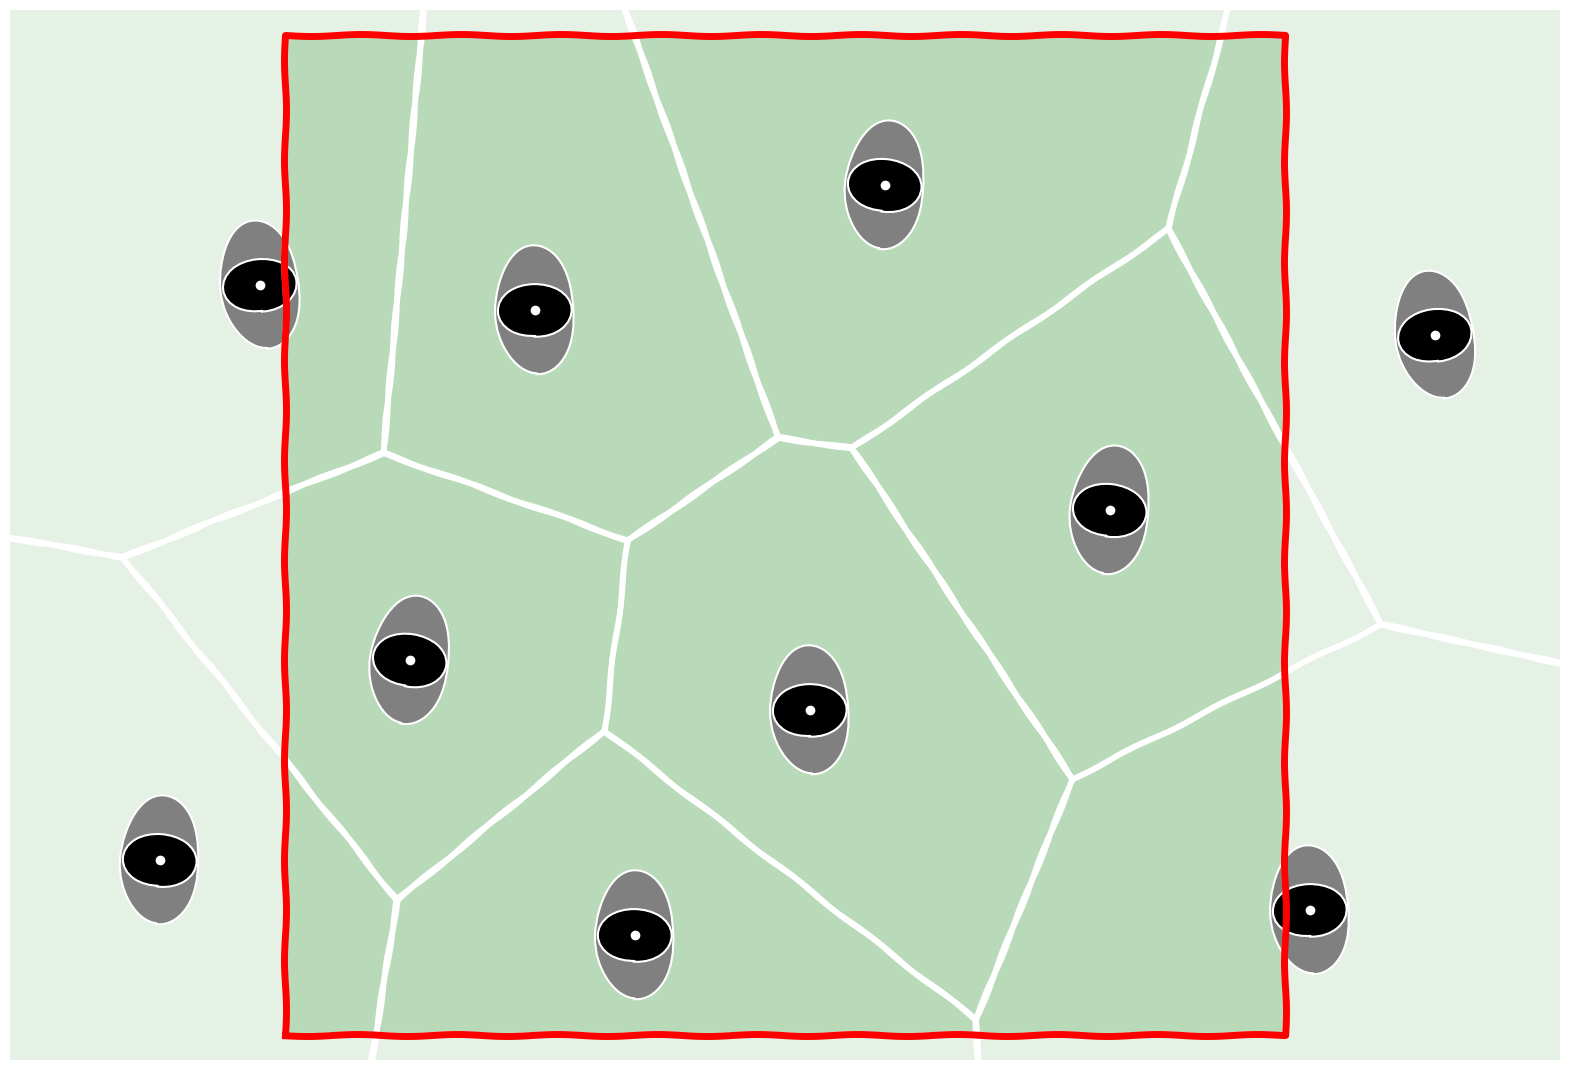

In [16]:
with plt.xkcd(randomness=1):
    measurement_area = Polygon([(-2, 0), (-2, 4), (2, 4), (2, 0)])
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_aspect("equal")

    for region, ped in compute_voronoi(peds).items():
        ax.plot(*region.exterior.xy, color="w", lw=3)
        ax.fill(*region.exterior.xy, color="g", alpha=0.05)
        ax.fill(
            *region.intersection(measurement_area).exterior.xy,
            color="g",
            alpha=0.1,
        )

    for ped in peds:
        # alpha = 1 if measurement_area.contains(Point(ped[0])) else 0.2
        alpha = 1
        plot_ped(ax, ped[0], ped[1], alpha)

    ax.plot(*measurement_area.exterior.xy, color="r", lw=5)

    ax.set_xlim([-3.1, 3.1])
    ax.set_ylim([-0.1, 4.1])
    plt.axis("off")
    # plt.savefig(output_path / "voronoi_density.png", bbox_inches="tight")
    plt.show()

### With cut-off

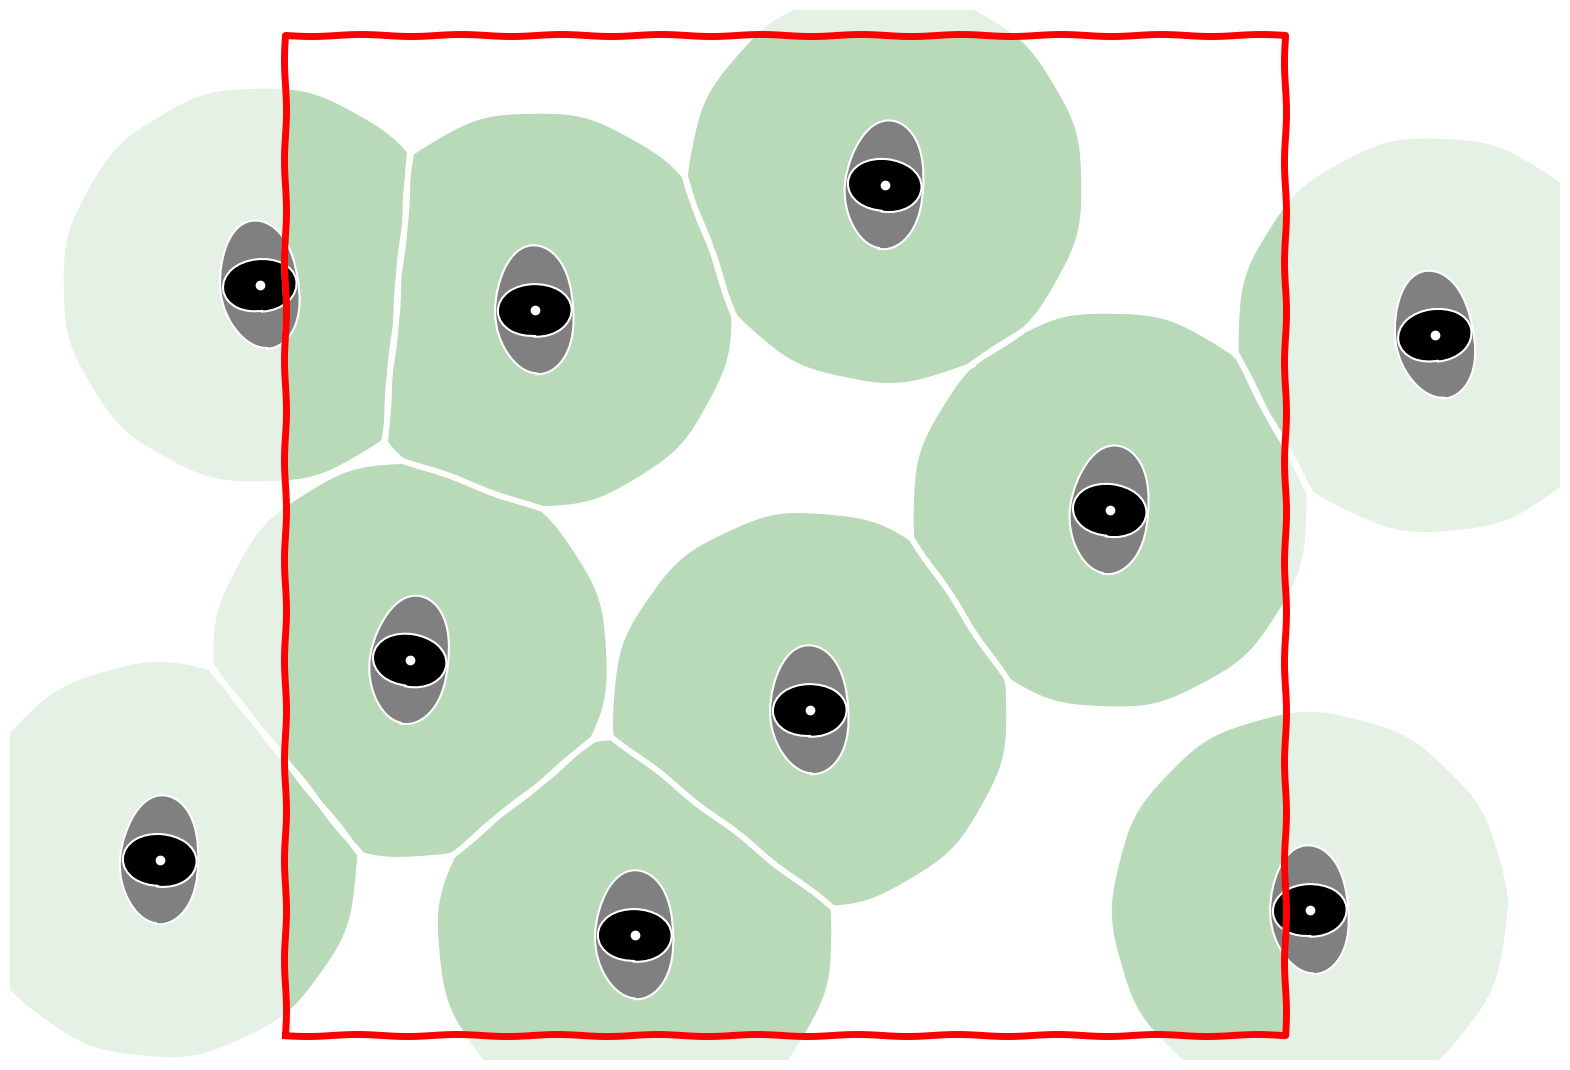

In [17]:
with plt.xkcd(randomness=1):
    measurement_area = Polygon([(-2, 0), (-2, 4), (2, 4), (2, 0)])
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_aspect("equal")

    # ax.fill(*measurement_area.exterior.xy, color="r", alpha=0.1)

    for region, ped in compute_voronoi(peds).items():
        cut_off_region = region.intersection(
            Point(ped).buffer(0.8, quadsegs=100)
        )
        ax.plot(*cut_off_region.exterior.xy, color="w", lw=3)
        ax.fill(*cut_off_region.exterior.xy, color="g", alpha=0.05)
        ax.fill(
            *cut_off_region.intersection(measurement_area).exterior.xy,
            color="g",
            alpha=0.1,
        )

    for ped in peds:
        # alpha = 1 if measurement_area.contains(Point(ped[0])) else 0.2
        alpha = 1
        plot_ped(ax, ped[0], ped[1], alpha)
    ax.plot(*measurement_area.exterior.xy, color="r", lw=5)

    ax.set_xlim([-3.1, 3.1])
    ax.set_ylim([-0.1, 4.1])
    plt.axis("off")
    # plt.savefig(output_path / "voronoi_cutoff_density.png", bbox_inches="tight")
    plt.show()

### Difference n edges

In [18]:
n_peds = 8

peds = [([3 * i, 0], 0) for i in range(n_peds)]

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfo

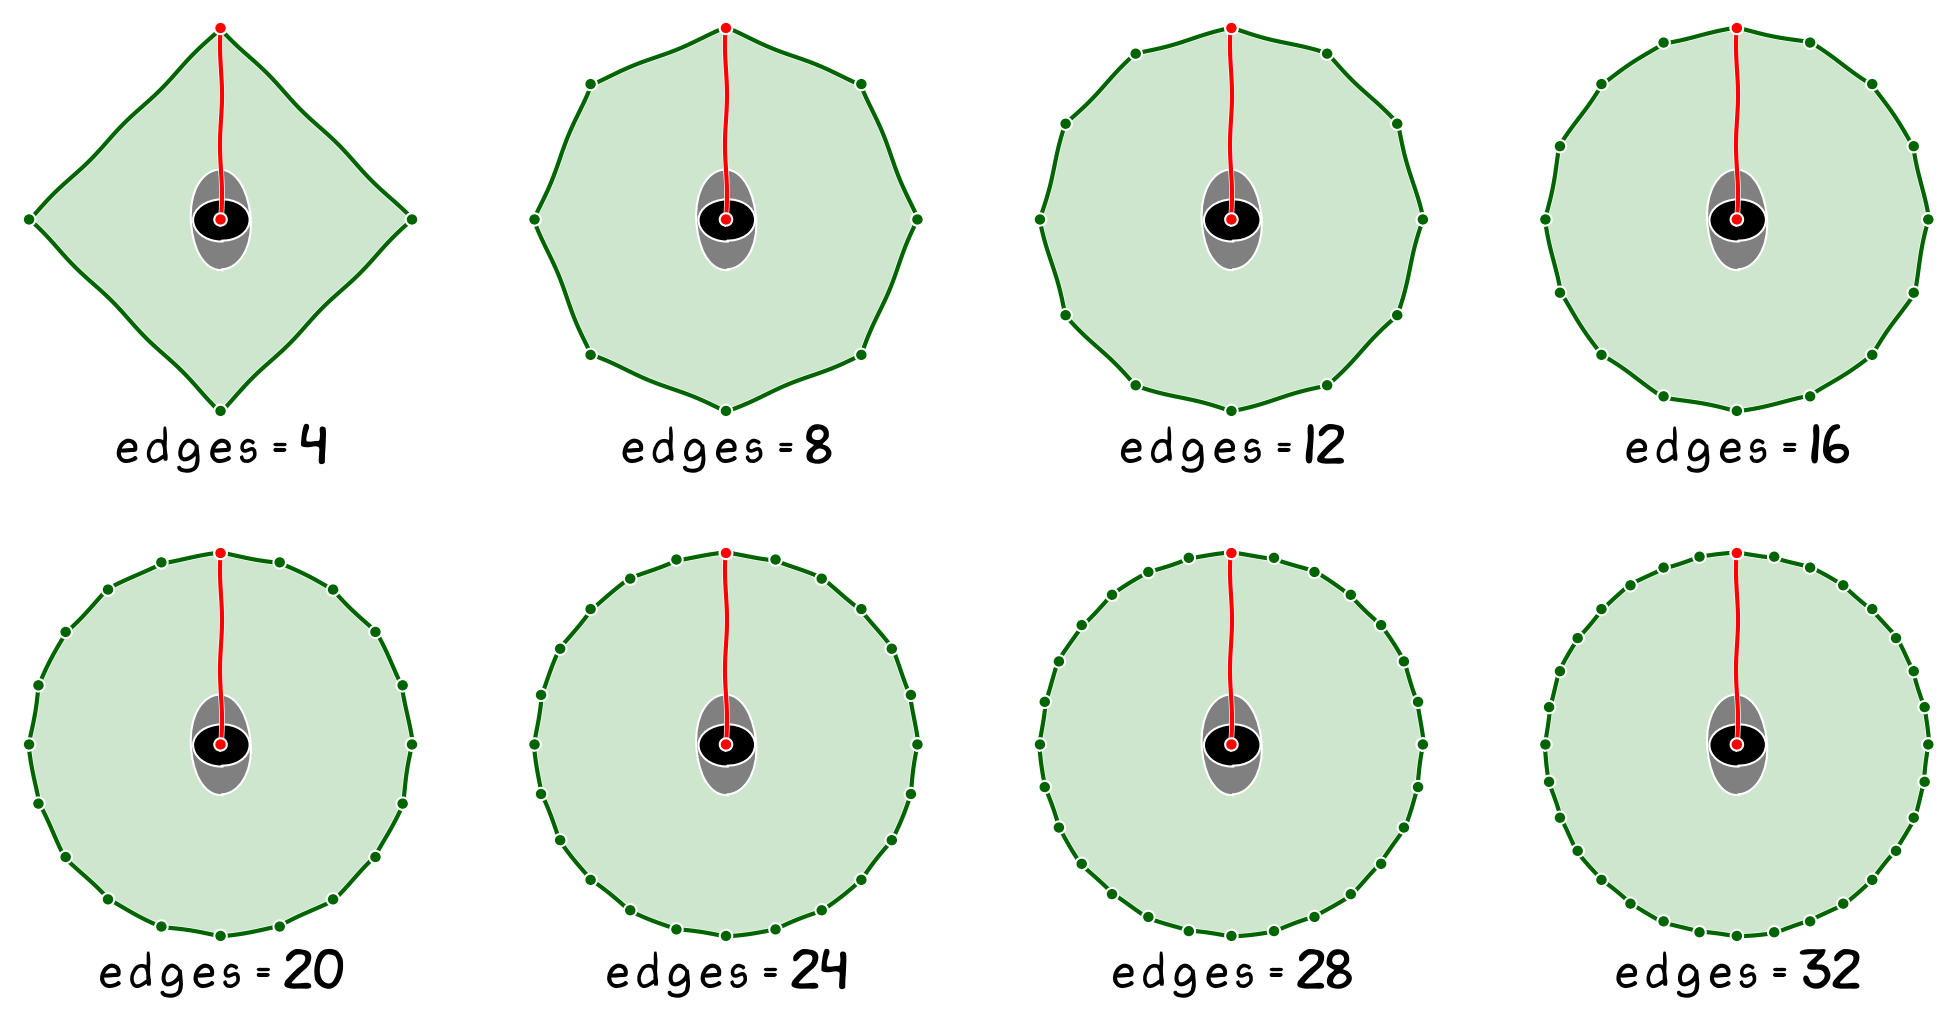

In [19]:
with plt.xkcd(randomness=1):
    n_peds = 8
    fig, axes = plt.subplots(nrows=2, ncols=int(n_peds / 2), figsize=(25, 12.5))

    factor = 1
    for ax in axes.ravel():
        cut_off_region = Point([0, 0]).buffer(1, quadsegs=factor)
        ax.plot(
            *cut_off_region.exterior.xy,
            color="darkgreen",
            lw=3,
            marker="o",
            markerfacecolor="darkgreen",
        )
        ax.plot([0, 0], [0, 1], color="red", lw=3, marker="o")
        ax.fill(*cut_off_region.exterior.xy, color="g", alpha=0.1)

        # ax.annotate()
        ax.text(  #
            # 0, -1.25, f"edges = {4*factor}\narea = $r * {cut_off_region.area:0.3f}\,m^2$",
            0,
            -1.2,
            f"edges = {4*factor}",
            size=35,
            va="center",
            ha="center",
        )
        # ax.annotate("radius",
        #     xy=(0.05, 0.5), xycoords='data',
        #     xytext=(1.3, 0.7), textcoords='data',
        #     size=30, va="center", ha="center",
        #     arrowprops=dict(arrowstyle="simple",
        #                     connectionstyle="arc3,rad=0.2"),
        #     )

        factor += 1
        plot_ped(ax, [0, 0], 0, 1)
        ax.set_aspect("equal")
        ax.axis("off")
    # plt.savefig(output_path / "voronoi_cutoff_differences.png", bbox_inches="tight")
    plt.show()

## Velocity

### Both sides

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfo

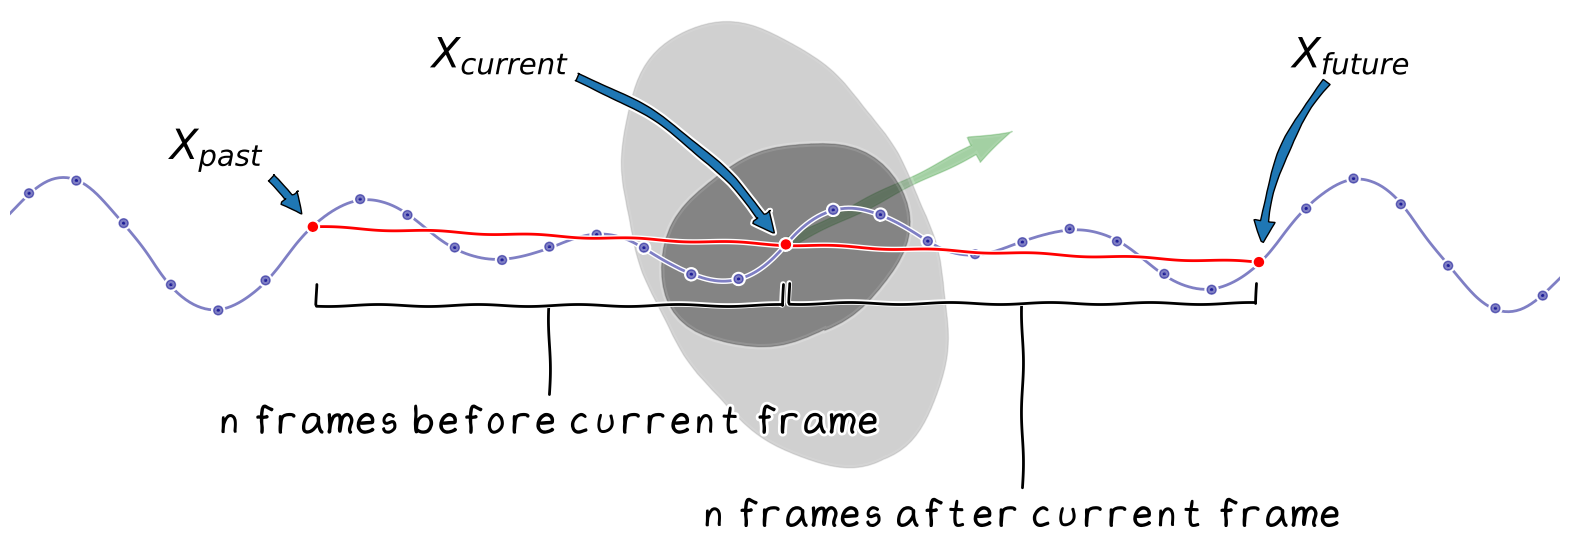

In [20]:
with plt.xkcd(randomness=1):
    alpha = 0.2
    np.random.seed(2)
    x = np.linspace(-1, 1, 1000)

    y = np.convolve(
        randint(0, 100) * np.sin(randint(0, 100) * x),
        randint(0, 100) * np.cos(randint(0, 100) * x),
        "same",
    )
    y = (
        MinMaxScaler(feature_range=(-0.07, 0.07))
        .fit_transform(y.reshape(-1, 1))
        .reshape(-1)
    )

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.arrow(0, 0, 0.2, 0.1, width=0.01, alpha=alpha, color="green")

    plot_ped(ax, [0, 0], 25, alpha)

    ax.plot(x, y, c="darkblue", marker="o", markevery=25, alpha=0.5)
    index_left = int(len(x) / 2 - len(x) / 4)
    index_right = int(len(x) / 2 + len(x) / 4)
    ax.plot(
        [x[index_right], x[int(len(x) / 2)], x[index_left]],
        [y[index_right], y[int(len(x) / 2)], y[index_left]],
        c="r",
        marker="o",
    )
    ax.annotate(
        "n frames before current frame",
        fontsize=30,
        xy=(
            x[index_left] + 0.5 * (x[int(len(x) / 2)] - x[index_left]),
            y[index_left] + 0.5 * (y[int(len(x) / 2)] - y[index_left]) - 0.07,
        ),
        arrowprops=dict(arrowstyle="-[, widthB=5.6, lengthB=0.5", lw=2.0),
        ha="center",
        va="bottom",
        xytext=(
            x[index_left] + 0.5 * (x[int(len(x) / 2)] - x[index_left]),
            y[index_left] + 0.5 * (y[int(len(x) / 2)] - y[index_left]) - 0.22,
        ),
    )

    ax.annotate(
        "n frames after current frame",
        fontsize=30,
        xy=(
            x[index_right] + 0.5 * (x[int(len(x) / 2)] - x[index_right]),
            y[index_right] + 0.5 * (y[int(len(x) / 2)] - y[index_right]) - 0.05,
        ),
        arrowprops=dict(arrowstyle="-[, widthB=5.6, lengthB=0.5", lw=2.0),
        ha="center",
        va="bottom",
        xytext=(
            x[index_right] + 0.5 * (x[int(len(x) / 2)] - x[index_right]),
            y[index_right] + 0.5 * (y[int(len(x) / 2)] - y[index_right]) - 0.3,
        ),
    )

    ax.annotate(
        "$X_{past}$",
        xy=(-0.51, 0.03),
        xycoords="data",
        xytext=(-0.6, 0.1),
        textcoords="data",
        size=30,
        va="center",
        ha="center",
        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=-0.2"),
    )

    ax.annotate(
        "$X_{current}$",
        xy=(-0.01, 0.01),
        xycoords="data",
        xytext=(-0.3, 0.2),
        textcoords="data",
        size=30,
        va="center",
        ha="center",
        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=-0.2"),
    )

    ax.annotate(
        "$X_{future}$",
        xy=(0.505, -0.0),
        xycoords="data",
        xytext=(0.6, 0.2),
        textcoords="data",
        size=30,
        va="center",
        ha="center",
        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.2"),
    )

    ax.set_xlim([-0.82, 0.82])
    ax.set_aspect("equal")
    alpha = 0.5
    plt.axis("off")
    # plt.savefig(output_path / "velocity_both.png", bbox_inches="tight")
    plt.show()

### past

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.


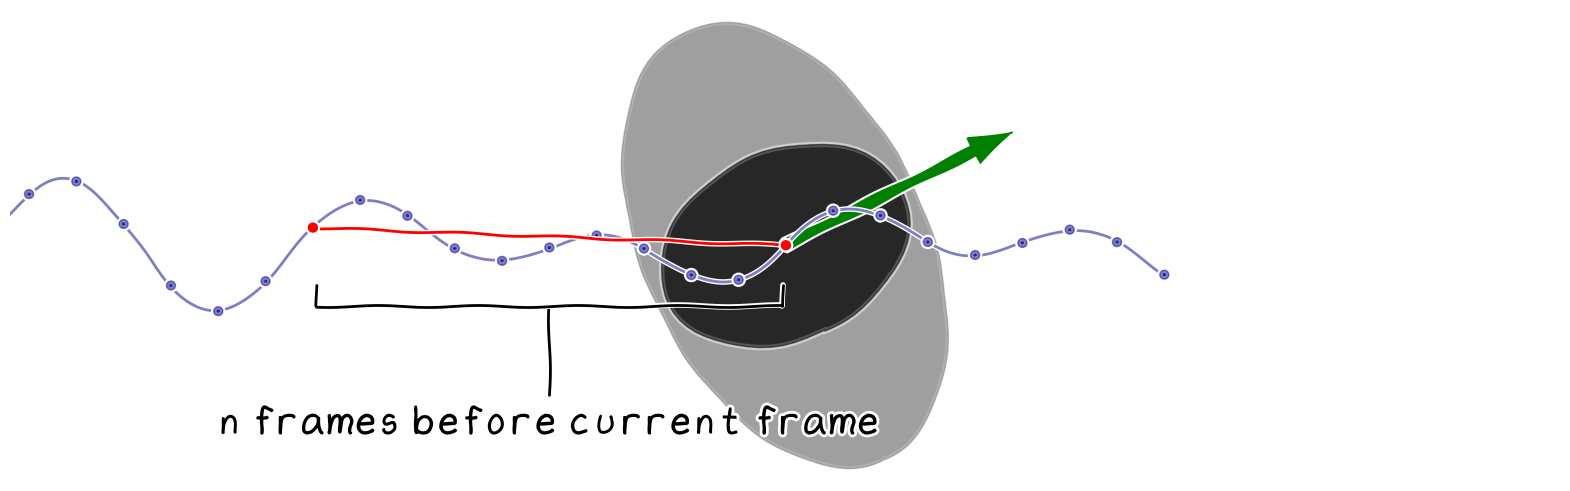

In [21]:
with plt.xkcd(randomness=1):
    np.random.seed(2)
    x = np.linspace(-1, 1, 1000)

    # y = randint(0, 100)*np.sin(randint(0,100)*x)+randint(0,100)*np.cos(randint(0,100)*x)
    y = np.convolve(
        randint(0, 100) * np.sin(randint(0, 100) * x),
        randint(0, 100) * np.cos(randint(0, 100) * x),
        "same",
    )
    y = (
        MinMaxScaler(feature_range=(-0.07, 0.07))
        .fit_transform(y.reshape(-1, 1))
        .reshape(-1)
    )

    fig, ax = plt.subplots(figsize=(20, 20))
    plot_ped(ax, [0, 0], 25, alpha)

    ax.plot(x[:701], y[:701], c="darkblue", marker="o", markevery=25, alpha=0.5)
    index_left = int(len(x) / 2 - len(x) / 4)
    index_right = int(len(x) / 2 + len(x) / 4)
    ax.plot(
        [x[int(len(x) / 2)], x[index_left]],
        [y[int(len(x) / 2)], y[index_left]],
        c="r",
        marker="o",
    )
    ax.arrow(0, 0, 0.2, 0.1, width=0.01, alpha=1, color="green")
    ax.annotate(
        "n frames before current frame",
        fontsize=30,
        xy=(
            x[index_left] + 0.5 * (x[int(len(x) / 2)] - x[index_left]),
            y[index_left] + 0.5 * (y[int(len(x) / 2)] - y[index_left]) - 0.07,
        ),
        arrowprops=dict(arrowstyle="-[, widthB=5.6, lengthB=0.5", lw=2.0),
        ha="center",
        va="bottom",
        xytext=(
            x[index_left] + 0.5 * (x[int(len(x) / 2)] - x[index_left]),
            y[index_left] + 0.5 * (y[int(len(x) / 2)] - y[index_left]) - 0.22,
        ),
    )

    ax.set_xlim([-0.82, 0.82])
    ax.set_aspect("equal")
    alpha = 0.5
    plt.axis("off")
    # plt.savefig(output_path / "velocity_past.png", bbox_inches="tight")
    plt.show()

### future

findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.


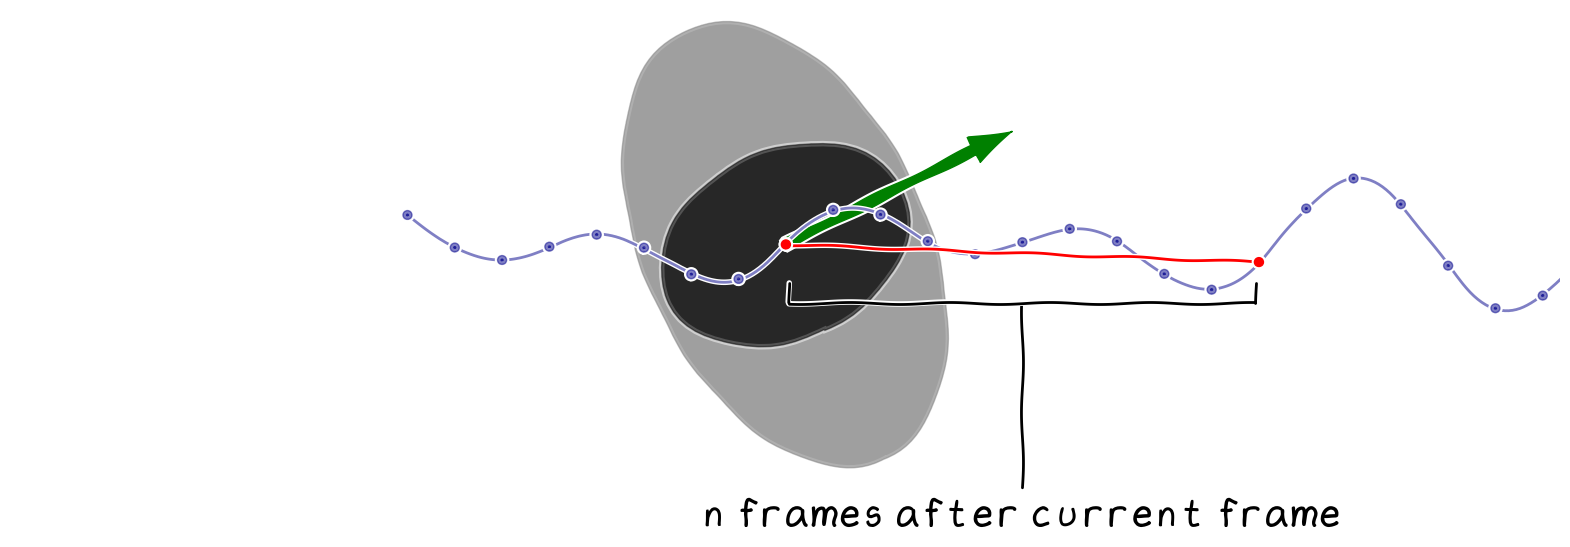

In [22]:
with plt.xkcd(randomness=1):
    np.random.seed(2)
    x = np.linspace(-1, 1, 1000)

    y = np.convolve(
        randint(0, 100) * np.sin(randint(0, 100) * x),
        randint(0, 100) * np.cos(randint(0, 100) * x),
        "same",
    )
    y = (
        MinMaxScaler(feature_range=(-0.07, 0.07))
        .fit_transform(y.reshape(-1, 1))
        .reshape(-1)
    )

    fig, ax = plt.subplots(figsize=(20, 20))
    plot_ped(ax, [0, 0], 25, alpha)

    ax.plot(x[300:], y[300:], c="darkblue", marker="o", markevery=25, alpha=0.5)
    index_left = int(len(x) / 2 - len(x) / 4)
    index_right = int(len(x) / 2 + len(x) / 4)
    ax.plot(
        [x[index_right], x[int(len(x) / 2)]],
        [y[index_right], y[int(len(x) / 2)]],
        c="r",
        marker="o",
    )
    ax.arrow(0, 0, 0.2, 0.1, width=0.01, alpha=1, color="green")

    ax.annotate(
        "n frames after current frame",
        fontsize=30,
        xy=(
            x[index_right] + 0.5 * (x[int(len(x) / 2)] - x[index_right]),
            y[index_right] + 0.5 * (y[int(len(x) / 2)] - y[index_right]) - 0.05,
        ),
        arrowprops=dict(arrowstyle="-[, widthB=5.6, lengthB=0.5", lw=2.0),
        ha="center",
        va="bottom",
        xytext=(
            x[index_right] + 0.5 * (x[int(len(x) / 2)] - x[index_right]),
            y[index_right] + 0.5 * (y[int(len(x) / 2)] - y[index_right]) - 0.3,
        ),
    )
    ax.set_xlim([-0.82, 0.82])
    ax.set_aspect("equal")
    alpha = 0.5
    plt.axis("off")
    # plt.savefig(output_path / "velocity_future.png", bbox_inches="tight")
    plt.show()

# Getting started guide

In [72]:
from shapely import LineString

left_obstacle = LineString(
    [[-0.25, -1], [-0.25, 0], [-2.8, 0], [-2.8, 7]]
).buffer(0.2, single_sided=True, cap_style="flat", join_style="mitre")
right_obstacle = LineString([[0.25, -1], [0.25, 0], [2.8, 0], [2.8, 7]]).buffer(
    -0.2, single_sided=True, cap_style="flat", join_style="mitre"
)

In [89]:
list(right_obstacle.exterior.coords)

[(0.25, -1.0),
 (0.25, 0.0),
 (2.8, 0.0),
 (2.8, 7.0),
 (3.0, 7.0),
 (3.0, -0.2),
 (0.45, -0.2),
 (0.45, -1.0),
 (0.25, -1.0)]

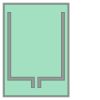

In [73]:
from pedpy import WalkableArea

walkable_area = WalkableArea(
    [
        (3.5, -2),
        (3.5, 8),
        (-3.5, 8),
        (-3.5, -2),
    ],
    [
        tuple(left_obstacle.exterior.coords),
        tuple(right_obstacle.exterior.coords),
    ],
)
walkable_area.polygon

In [86]:
walkable_area.polygon.wkt

'POLYGON ((3.5 -2, 3.5 8, -3.5 8, -3.5 -2, 3.5 -2), (-2.8 7, -2.8 0, -0.25 0, -0.25 -1, -0.45 -1, -0.45 -0.2, -3 -0.2, -3 7, -2.8 7), (0.25 -1, 0.25 0, 2.8 0, 2.8 7, 3 7, 3 -0.2, 0.45 -0.2, 0.45 -1, 0.25 -1))'

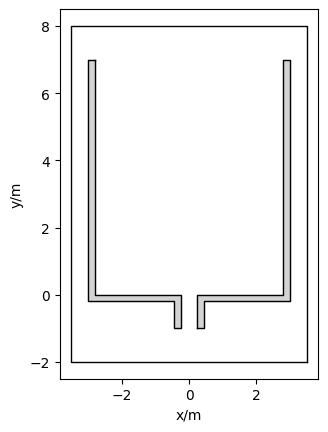

In [96]:
from pedpy import plot_walkable_area

ax = plot_walkable_area(
    walkable_area=walkable_area, hole_color="lightgrey"
).set_aspect("equal")

# ax.set_aspect("equal")
# ax.grid()

In [44]:
from pedpy import MeasurementLine

measurement_line = MeasurementLine([(0.25, 0), (-0.25, 0)])

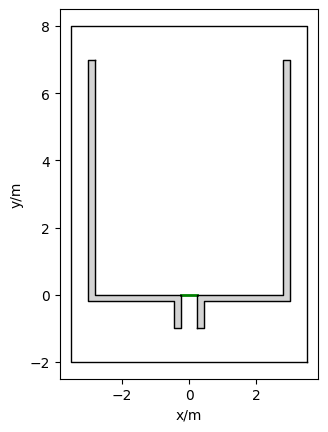

In [84]:
from pedpy.plotting.plotting import plot_measurement_setup

ax = plot_measurement_setup(
    walkable_area=walkable_area,
    measurement_lines=[measurement_line],
    hole_color="lightgrey",
    ml_color="g",
    ml_width=2,
)

ax.set_aspect("equal")

In [48]:
from pedpy import MeasurementArea

measurement_area = MeasurementArea(
    [(-0.4, 0.5), (0.4, 0.5), (0.4, 1.3), (-0.4, 1.3)]
)

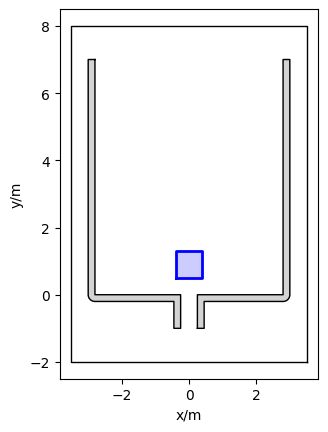

In [52]:
from pedpy.plotting.plotting import plot_measurement_setup

ax = plot_measurement_setup(
    walkable_area=walkable_area,
    measurement_areas=[measurement_area],
    hole_color="lightgrey",
    ma_color="b",
    ma_line_color="b",
    ma_line_width=2,
    ma_alpha=0.2,
)

ax.set_aspect("equal")

In [56]:
from pedpy import load_trajectory
import pathlib

traj = load_trajectory(
    trajectory_file=pathlib.Path("getting_started/040_c_56_h-.txt")
)
traj

TrajectoryData:
        file: getting_started/040_c_56_h-.txt
        frame rate: 25.0
        frames: [(0, 1656)]
        number pedestrians: 75
        bounding box: (-2.6042, -1.8723, 2.2641, 5.98)
        data: 
           ID  frame       X       Y     Z                 points
0   1      0  2.1569  2.6590  1.76   POINT (2.1569 2.659)
1   1      1  2.1498  2.6653  1.76  POINT (2.1498 2.6653)
2   1      2  2.1532  2.6705  1.76  POINT (2.1532 2.6705)
3   1      3  2.1557  2.6496  1.76  POINT (2.1557 2.6496)
4   1      4  2.1583  2.6551  1.76  POINT (2.1583 2.6551)
5   1      5  2.1643  2.6508  1.76  POINT (2.1643 2.6508)
6   1      6  2.1723  2.6477  1.76  POINT (2.1723 2.6477)
7   1      7  2.1845  2.6485  1.76  POINT (2.1845 2.6485)
8   1      8  2.1988  2.6491  1.76  POINT (2.1988 2.6491)
9   1      9  2.2138  2.6540  1.76   POINT (2.2138 2.654)
        

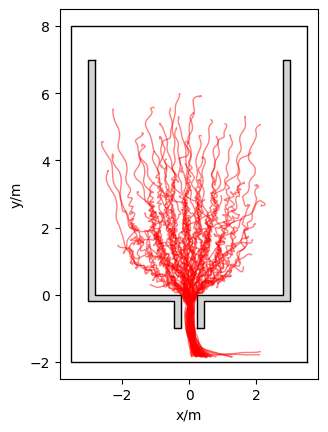

In [79]:
from pedpy.plotting.plotting import plot_trajectories

ax = plot_trajectories(
    traj=traj,
    walkable_area=walkable_area,
    traj_alpha=0.5,
    traj_width=1,
    hole_color="lightgrey",
)

ax.set_aspect("equal")

In [76]:
from pedpy import get_invalid_trajectory

get_invalid_trajectory(traj=traj, walkable_area=walkable_area)

,ID,frame,X,Y,Z,points


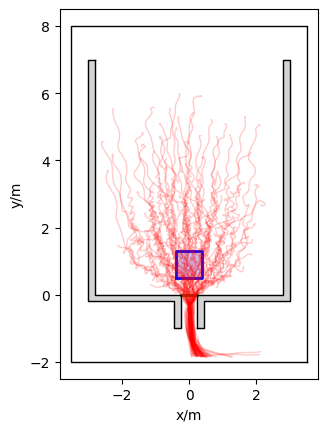

In [83]:
ax = plot_measurement_setup(
    walkable_area=walkable_area,
    hole_color="lightgrey",
    measurement_areas=[measurement_area],
    ma_color="b",
    ma_line_color="b",
    ma_line_width=2,
    ma_alpha=0.2,
    measurement_lines=[measurement_line],
    ml_color="g",
    ml_width=2,
    traj=traj,
    traj_alpha=0.2,
    traj_width=1,
)

ax.set_aspect("equal")

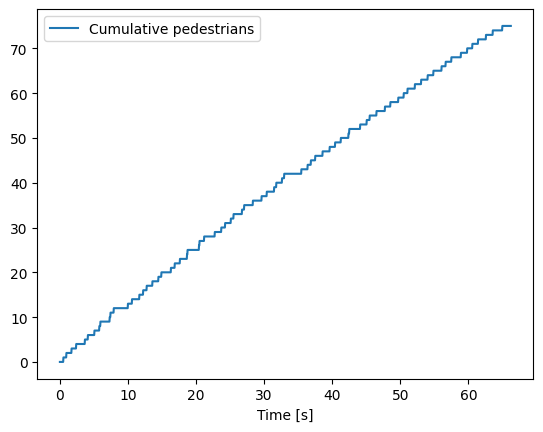

In [94]:
from pedpy import compute_n_t

nt, _ = compute_n_t(
    traj_data=traj.data,
    measurement_line=measurement_line,
    frame_rate=traj.frame_rate,
)
nt.plot(x="Time [s]");